In [1]:

import pandas as pd
titanic_df = pd.read_csv('https://raw.githubusercontent.com/gsdavis1959/Data/master/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# STEP 2: Data Types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# STEP 3: Missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## filling nulls with mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

## filling nulls with mode
embarked_mode = titanic_df['Embarked'].mode()
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(embarked_mode[0])

## count of nulls
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

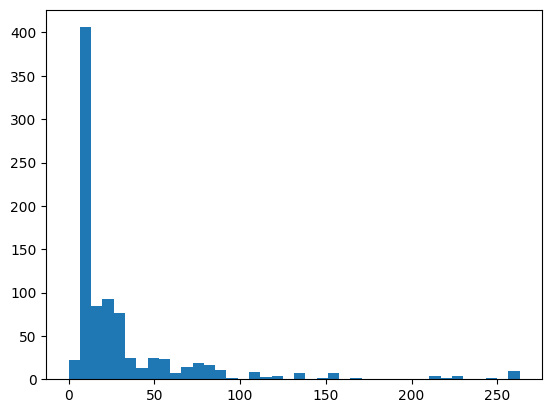

In [8]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Fare'],bins = 40)
plt.show()

In [7]:
titanic_df.loc[titanic_df['Fare'] < 300,'Fare'].max()
## 263

# capping the fare to 263
titanic_df.loc[titanic_df['Fare'] > 300,'Fare'] = 263

In [10]:
## siblling or spouse
sibsp_count = titanic_df.groupby(['SibSp','Survived'])['PassengerId'].count().reset_index().rename(columns = {'PassengerId':'count'}).\
sort_values('count',ascending = False).head(5)


sibsp_count["Survived"] = sibsp_count["Survived"].astype(str)

fig = px.bar(sibsp_count, x="SibSp", y="count", color="Survived", title="Impact of count of siblings/spouse on the survival")
fig.show()

In [13]:
## Gender

import plotly.express as px

gender_count = titanic_df.groupby(['Sex','Survived'])['PassengerId'].count().reset_index().rename(columns = {'PassengerId':'count'}).\
sort_values('count',ascending = False).head(5)

gender_count["Survived"] = gender_count["Survived"].astype(str)

fig = px.bar(gender_count, x="Sex", y="count", color="Survived", title="Who were more probable to survive - Males or Females")
fig.show()

In [14]:
Embarked_count = titanic_df.groupby(['Embarked','Survived'])['PassengerId'].count().reset_index().rename(columns = {'PassengerId':'count'}).\
sort_values('count',ascending = False).head(5)

Embarked_count["Survived"] = Embarked_count["Survived"].astype(str)

fig = px.bar(Embarked_count, x="Embarked", y="count", color="Survived", title="Impact of embarked on the survival")
fig.show()

In [15]:
## creating age groups
titanic_df.loc[titanic_df['Age']<=15,'age_group'] = 'less than eq 15'
titanic_df.loc[titanic_df['Age']>15,'age_group'] = '15 and 30'
titanic_df.loc[titanic_df['Age']>30,'age_group'] = '30 and 40'
titanic_df.loc[titanic_df['Age']>40,'age_group'] = '40 and 50'
titanic_df.loc[titanic_df['Age']>50,'age_group'] = '>50'

## bar graph
Embarked_count = titanic_df.groupby(['age_group','Survived'])['PassengerId'].count().reset_index().rename(columns = {'PassengerId':'count'}).\
sort_values('count',ascending = False)

Embarked_count["Survived"] = Embarked_count["Survived"].astype(str)

fig = px.bar(Embarked_count, x="age_group", y="count", color="Survived", title="Impact of embarked on the survival")
fig.show()